In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv('German Credit Data.csv')

In [3]:
#Data Exploration
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
ds.tail(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
ds.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
ds.corr()['Credit amount'].sort_values(ascending=False)

Credit amount    1.000000
Duration         0.624984
Job              0.285385
Age              0.032716
Name: Credit amount, dtype: float64

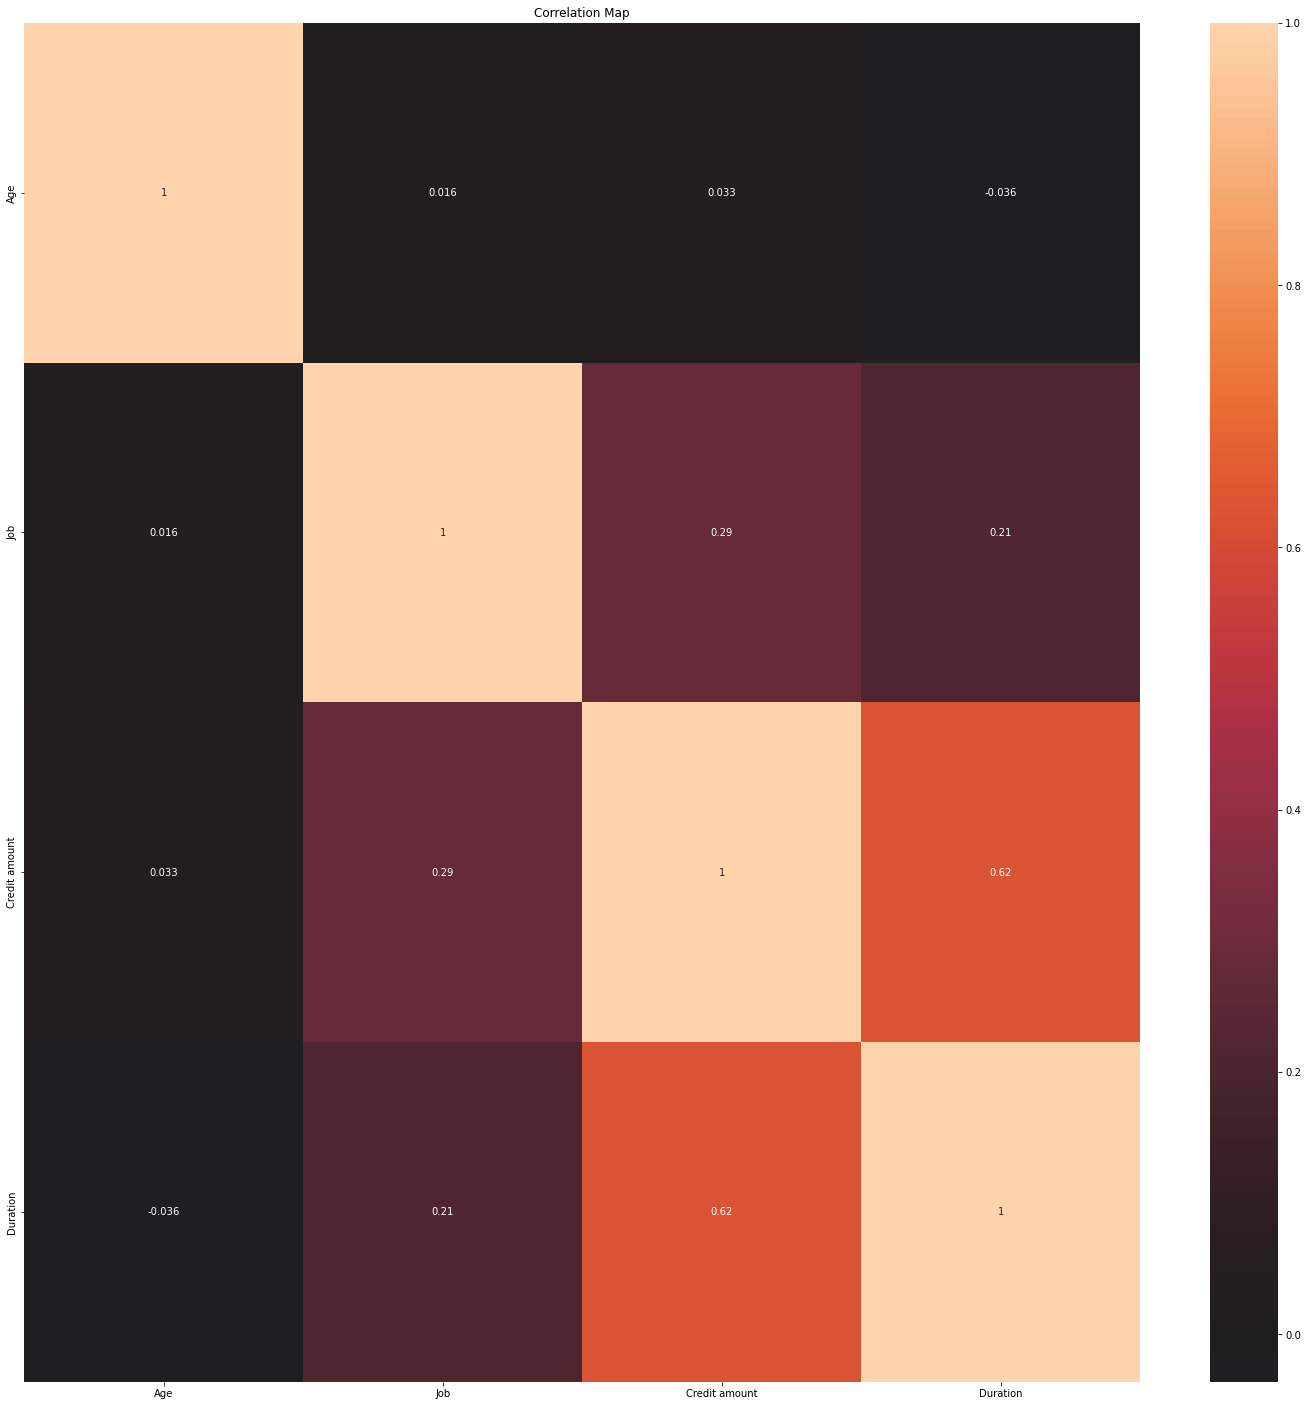

In [8]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(ds.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [9]:
num_atr=['Job','Credit amount','Duration']

cat_atr=['Sex','Housing','Saving accounts','Checking account','Purpose']

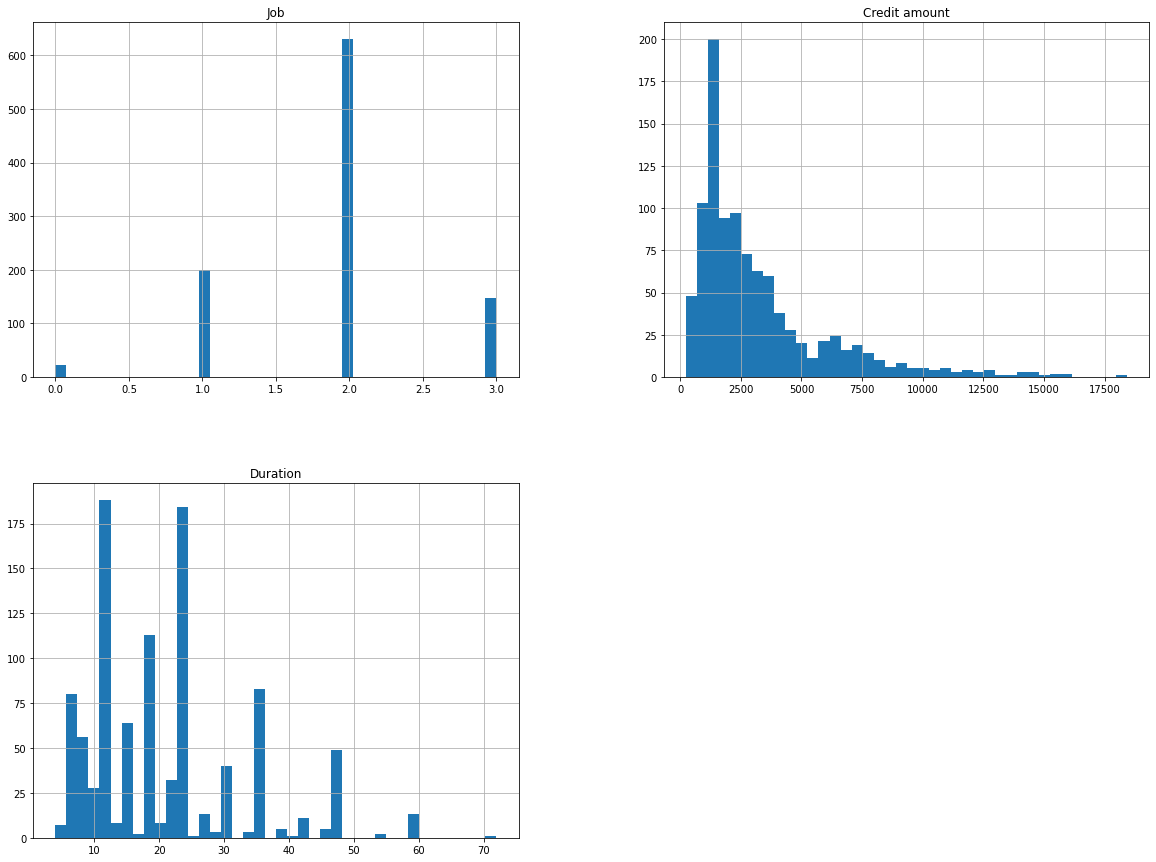

In [10]:
ds[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

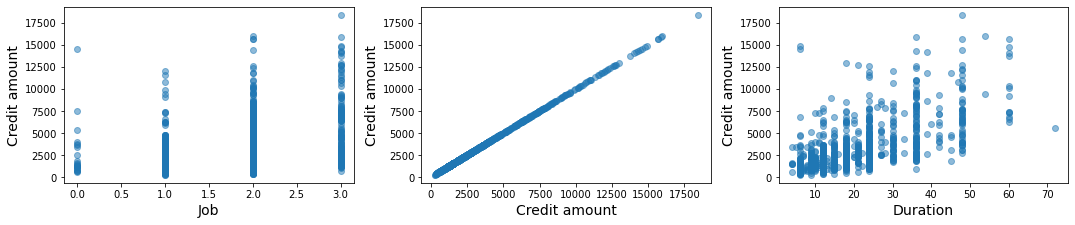

In [11]:
plt.figure(figsize=(20,12))
x=1
for i in num_atr:
    plt.subplot(4,4,x)
    plt.scatter(data=ds,y='Credit amount',x=i,alpha=0.5)
    plt.ylabel('Credit amount',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

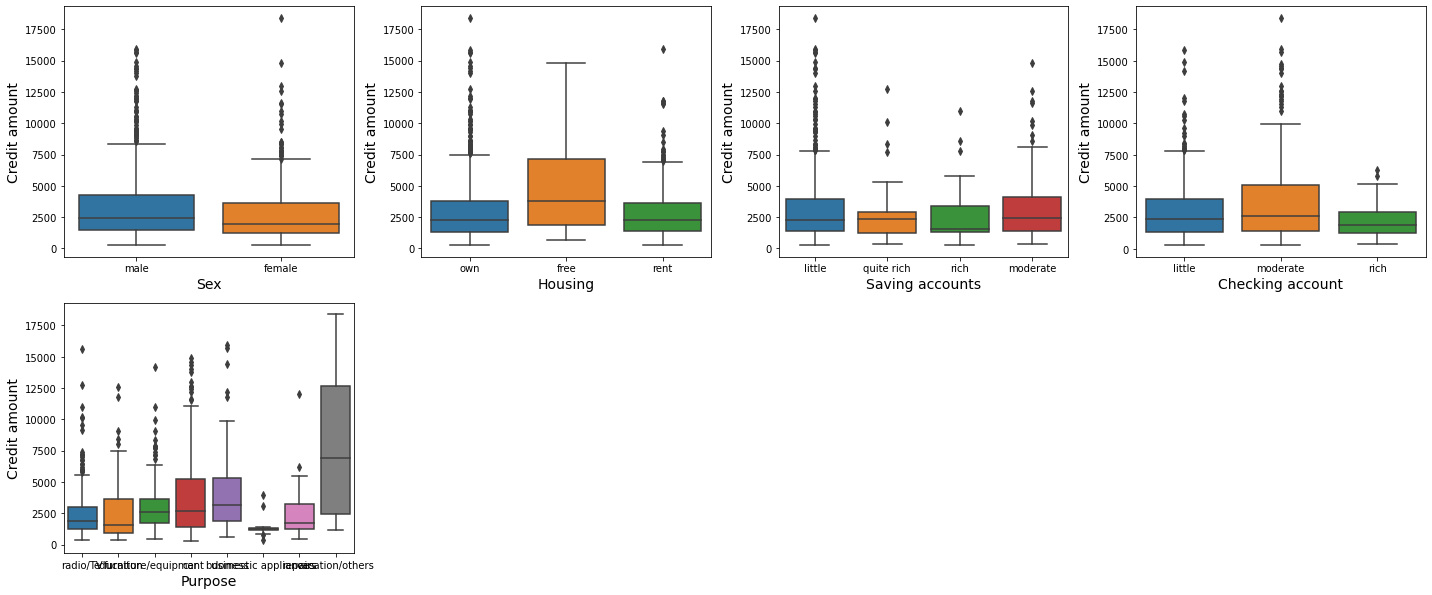

In [12]:
plt.figure(figsize=(20,12))
x=1
for i in cat_atr:
    plt.subplot(3,4,x)
    sns.boxplot(data=ds,y='Credit amount',x=i)
    plt.ylabel('Credit amount',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1
plt.show()

In [13]:
ds.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [14]:
ds.dropna(inplace=True, axis=0)

In [15]:
ds.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [16]:
ds.shape

(522, 10)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 

In [18]:
from sklearn.model_selection import train_test_split
ds['Risk'] = ds['Risk'].replace ({'bad': 0,'good' : 1})
X= ds.iloc[:,1:-1]
y= ds.iloc[:, -1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
#ds. set_index( 'Credit amount', drop = False)


ds. reset_index()

,index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
2,4,53,male,2,free,little,little,4870,24,car,0
3,7,35,male,3,rent,little,moderate,6948,36,car,1
4,9,28,male,3,own,little,moderate,5234,30,car,0
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,1
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,1
519,996,40,male,3,own,little,little,3857,30,car,1
520,998,23,male,2,free,little,little,1845,45,radio/TV,0


In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_train[num_atr] = ss.fit_transform(X_train[num_atr])



C:\Users\Dikshant Vats\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [21]:
X_train[num_atr].head()

,Job,Credit amount,Duration
118,0.175787,0.358943,0.970863
959,0.175787,-0.064950,0.247013
892,-1.316360,-0.379023,-0.718121
167,0.175787,-0.586773,-0.798549
634,-1.316360,-0.664416,0.247013


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\Users\Dikshant Vats\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
X_train[cat_atr].head()

,Sex,Housing,Saving accounts,Checking account,Purpose
118,0,1,2,0,4
959,1,0,1,1,4
892,1,1,0,0,1
167,0,1,3,1,4
634,0,1,0,1,1


In [24]:
#a = pd.DataFrame(X_train[cat_atr])
#b = pd.DataFrame(X_train[num_atr])
a=X_train[cat_atr]
b=X_train[num_atr]
#b = ss.transform(price[num_atr])
print (a.head())
print (b.head())
# 7.1 Horizontally concatenate now
#Xtr = np.hstack([a,b]) # It is not X_train
#Xtr.shape # (11,15)

     Sex  Housing  Saving accounts  Checking account  Purpose
118    0        1                2                 0        4
959    1        0                1                 1        4
892    1        1                0                 0        1
167    0        1                3                 1        4
634    0        1                0                 1        1
          Job  Credit amount  Duration
118  0.175787       0.358943  0.970863
959  0.175787      -0.064950  0.247013
892 -1.316360      -0.379023 -0.718121
167  0.175787      -0.586773 -0.798549
634 -1.316360      -0.664416  0.247013


In [25]:
Xtr = pd.concat([a,b], axis=1)

In [26]:
Xtr.head()

,Sex,Housing,Saving accounts,Checking account,Purpose,Job,Credit amount,Duration
118,0,1,2,0,4,0.175787,0.358943,0.970863
959,1,0,1,1,4,0.175787,-0.064950,0.247013
892,1,1,0,0,1,-1.316360,-0.379023,-0.718121
167,0,1,3,1,4,0.175787,-0.586773,-0.798549
634,0,1,0,1,1,-1.316360,-0.664416,0.247013


In [27]:
y_train.head()

118    0
959    1
892    1
167    1
634    0
Name: Risk, dtype: int64

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [29]:
reg.fit(Xtr, y_train)

RandomForestRegressor()

In [30]:
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_test[num_atr] = ss.fit_transform(X_test[num_atr])

le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

C:\Users\Dikshant Vats\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Dikshant Vats\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
a=X_test[cat_atr]
b=X_test[num_atr]

In [32]:
Xtr1 = pd.concat([a,b], axis=1)

In [33]:
Xtr1.head()

,Sex,Housing,Saving accounts,Checking account,Purpose,Job,Credit amount,Duration
819,1,1,0,0,5,0.197646,-0.646814,-0.344090
831,0,2,0,0,1,0.197646,-0.688751,-0.344090
11,0,2,0,0,0,0.197646,0.316435,2.060458
342,1,2,2,1,5,0.197646,-0.039541,-0.344090
140,1,1,3,2,1,-2.623295,-0.853573,-1.305910


In [34]:
reg.predict(Xtr1)

array([0.65, 0.16, 0.22, 0.61, 0.57, 0.22, 0.11, 0.91, 0.29, 0.79, 0.61,
       0.75, 0.23, 0.08, 0.84, 0.92, 0.52, 0.5 , 0.95, 0.6 , 0.21, 0.71,
       0.94, 0.86, 0.84, 0.34, 0.2 , 0.29, 0.07, 0.86, 0.62, 0.83, 0.43,
       0.66, 0.26, 0.74, 0.8 , 0.59, 0.77, 0.19, 0.76, 0.21, 0.07, 0.61,
       0.11, 0.63, 0.57, 0.42, 0.41, 0.71, 0.72, 0.4 , 0.17, 0.74, 0.55,
       0.41, 0.51, 0.72, 0.87, 0.31, 0.97, 0.43, 0.33, 0.72, 0.97, 0.48,
       0.05, 0.11, 0.48, 0.89, 0.88, 0.58, 0.48, 0.13, 0.82, 0.11, 0.07,
       0.11, 0.71, 0.52, 0.75, 0.17, 0.63, 0.65, 0.68, 0.9 , 0.06, 0.58,
       0.4 , 0.97, 0.62, 0.39, 0.21, 0.59, 0.28, 0.68, 0.06, 0.57, 0.46,
       0.41, 0.29, 0.91, 0.99, 0.97, 0.28, 0.46, 0.31, 0.74, 0.88, 0.16,
       0.46, 0.91, 0.08, 0.28, 0.52, 0.37, 0.34, 0.86, 0.6 , 0.39, 0.72,
       0.67, 0.41, 0.71, 0.74, 0.39, 0.43, 0.69, 0.45, 0.2 , 0.4 , 0.85,
       0.19, 0.1 , 0.15, 0.77, 0.87, 0.82, 0.71, 0.38, 0.34, 0.92, 0.63,
       0.67, 0.1 , 0.34, 0.38, 0.69, 0.64, 0.09, 0.